In [47]:
import numpy as np
import pylab as pl
import pandas as pd
from __future__ import print_function, division
import geopy.distance
import shapely
from geopandas import GeoDataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [87]:
#from mpl_toolkits.basemap import Basemap

###westlimit=-74.053479; southlimit=40.675069; eastlimit=-73.875505; northlimit=40.865857

In [88]:
# read file to csv
df1 = pd.read_csv("bc_data_stop.csv")
df_1 = df1[df1.latitude>0]
df_1.head()

,Unnamed: 0,Unnamed: 0.1,VendorID,shl_number,hack_number,lpep_datetime,latitude,longitude,type,distance,time_diff
0,631296,631297,2,AA001,5253054.0,2015-12-01 00:01:28,40.838933,-73.937628,10,0.000000,0
1,519310,519311,2,AA001,5253054.0,2015-12-01 00:05:28,40.838985,-73.937120,10,6.837580,2
2,576436,576437,2,AA001,5253054.0,2015-12-01 00:07:28,40.839012,-73.937178,10,5.741798,3
3,583726,583727,2,AA001,5253054.0,2015-12-01 00:09:28,40.838998,-73.937117,10,5.404212,4
4,609134,609135,2,AA001,5253054.0,2015-12-01 00:11:28,40.838992,-73.937152,10,3.041506,5


In [89]:
shape_path = "/Users/lexu/Desktop/Green Taxi - Urban Intensive/CT_Shape"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index = ct_shape.BoroCT2010

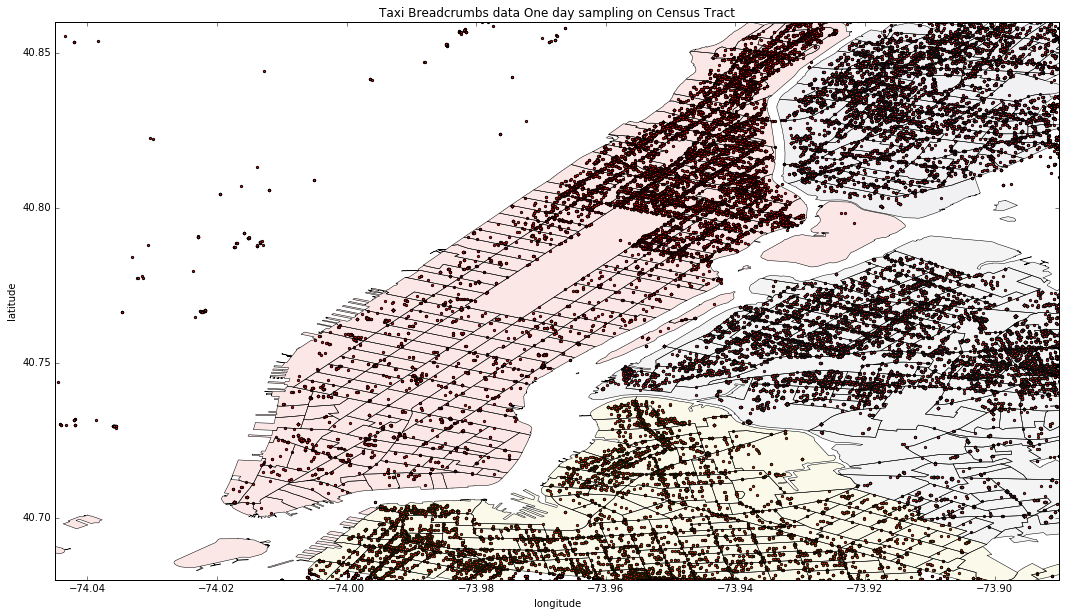

In [90]:

#westlimit=-74.045447; southlimit=40.681606; eastlimit=-73.895132; northlimit=40.863189
f, ax = plt.subplots(figsize = (18, 10))

ct_shape_Zoom=(ct_shape[ct_shape
                           .centroid
                           .apply(lambda c:c.x>-74.045 and c.x<-73.89 and c.y>40.68 and c.y<40.86)])


ax = ct_shape_Zoom.plot(column='BoroCode', alpha=0.1, linewidth=0.5, ax = ax)


ax = df_1.plot(kind='scatter', x='longitude', y='latitude',color='red',
                     xlim=(-74.045,-73.89), ylim=(40.68, 40.86), s=5, alpha=1, ax = ax)
plt.title("Taxi Breadcrumbs data One day sampling on Census Tract")
# scatter(x = df_1.longitude, y=df_1.latitude)


## This above plot shows a zoomed map with census tract layer of New York City, mainly Manhattan Island. The little red dots on the map are the geo points of taxi stop points. (within 10 meters, with least 4 minutes)

In [91]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ax = plt.subplots(figsize=(20,20))
 
# m = Basemap(projection='merc', lat_0 = 40, lon_0 = -73,
#     resolution = 'h', area_thresh = 0.1,
#     llcrnrlon=-74.053479, llcrnrlat=40.675069,
#     urcrnrlon=-73.875505, urcrnrlat=40.865857)
 
# m.drawcoastlines()
# m.drawcountries()
# m.fillcontinents(color = 'coral')
# m.drawmapboundary()

# y = list(df_1.latitude)
# x = list(df_1.longitude)
# m.scatter(x[1:5],y[1:5], 'o', markersize=10, color='#444444', alpha=0.8)

